In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Reading the training data 

In [36]:
df = pd.read_csv('dataset/train.csv')
# Rename 'austim' to 'autism'
df.rename(columns={'austim': 'autism'}, inplace=True)
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice autism  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [37]:
df.shape


(200, 21)

In [38]:
df.info()
#print(df.empty)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  autism           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [39]:
#getting summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


Inspecting data for any anomolies for data cleaning 
We can see in the output below that there are discrepencies such as 'other' '?' and 'Others' which probably are for some unkown value and are substituted as an indicator of that.

In [40]:
#Checking for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
#checking data types
print(df.dtypes)

#checking inconsistencies in each column of data
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'autism', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Number of duplicate rows: 0
ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
autism              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
dtype: object

Value counts for gender:
gender
m    125
f     75
Name: count, dtype: int64

Value counts for ethnicity:
ethnicity
White-European     66
?                  54
Middle Eastern     27
Asian              17
South Asian         9
Pasifika            8
Others              7
Latino              4
Turkish             3
Black               3
Hispanic            2
Name: count, dtype: int64

Value 

Cleaning data up after checking the descrepensies 

In [41]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


print(df.info())
print(df.describe().T)
#checking if data has been cleaned 
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    int64  
 15  autism           200 non-null    int64  
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

C:\Users\syedh\AppData\Local\Temp\ipykernel_21408\3126315188.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


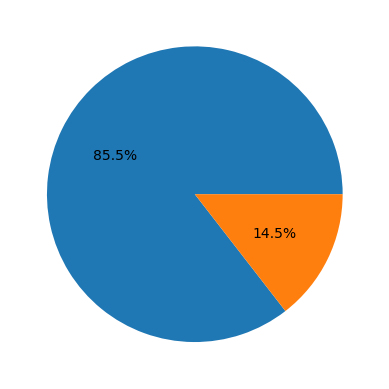

In [42]:

#visualising to check for any outliers
#numerical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

#for col in numerical_columns:
 #   plt.figure(figsize=(8, 4))
  #  sns.boxplot(x=df[col])
   # plt.title(f'Boxplot of {col}')
    #plt.show()



plt.pie(df['autism'].value_counts().values, autopct='%1.1f%%')
plt.show()
